In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [3]:
%matplotlib inline

## Calculando as distribuições de distância do ponto que dista r da origem no circulo unitário
Aqui lembrando de considerar que o círculo unitário é preenchido uniformemente por pontos

In [4]:
def make_distance_histogram(x_position, nbeans, sample_of_unit_circle):
    histogram = np.zeros(nbeans)
    gap_size = 2/nbeans
    for i in sample_of_unit_circle:
        dist_sq = 0
        for j in range(1,len(i)):
            dist_sq +=i[j]**2
        dist = np.sqrt((x_position - i[0])**2 +  dist_sq)
        bean = int((dist/gap_size))
        histogram[bean] = histogram[bean] + 1
    return histogram
    

In [5]:
def calcula_histograma_distribuicao_distancias_hiperesphera(dimension = 2):
    #Define Parametros para Histograma
    STEPS = np.arange(0,1.05,0.05)
    BEANS = 100
    beans_x = np.arange(0,2,2/BEANS)

    # Sorteia Pontos
    unit_circle = []
    while len(unit_circle) < 1000000:
        samples = np.random.random([1000000,dimension])
        samples = samples*2 -1
        for i in samples:
            dist_sq = 0
            for j in range(len(i)):
                dist_sq += i[j]**2
            if dist_sq <=1:
                unit_circle += [i]
        print(len(unit_circle))
        
    unit_circle = np.asarray(unit_circle)

    #Calcula Histogramas
    histograms = []
    print("Calculando Histogramas de dimensao " + str(dimension))

    for i in STEPS:
        print(" step " + str(i))
        histograms += [make_distance_histogram(i,BEANS,unit_circle)]

    #Normalizacao
    for i in range(len(histograms)):
        histograms[i] = histograms[i]/np.sum(histograms[i])
    
    #Plot
    plt.figure(figsize=(20,40))
    for i,step in enumerate(STEPS):
        plt.subplot(len(STEPS), 1,i+1)
        plt.plot(beans_x, histograms[i].tolist())
        n = len(histograms[i]) - 1
        k = histograms[i][n]
        while k==0:
            n = n-1
            k = histograms[i][n]
        plt.title("Step de " + str(step) + " finalizando contagem em " + str((n)*2/BEANS))
    plt.tight_layout() 
    plt.show()

In [6]:
calcula_histograma_distribuicao_distancias_hiperesphera()

784819
1570185
Calculando Histogramas de dimensao 2
 step 0.0
 step 0.05
 step 0.1
 step 0.15000000000000002


KeyboardInterrupt: 

Calculando Histogramas de dimensao 2


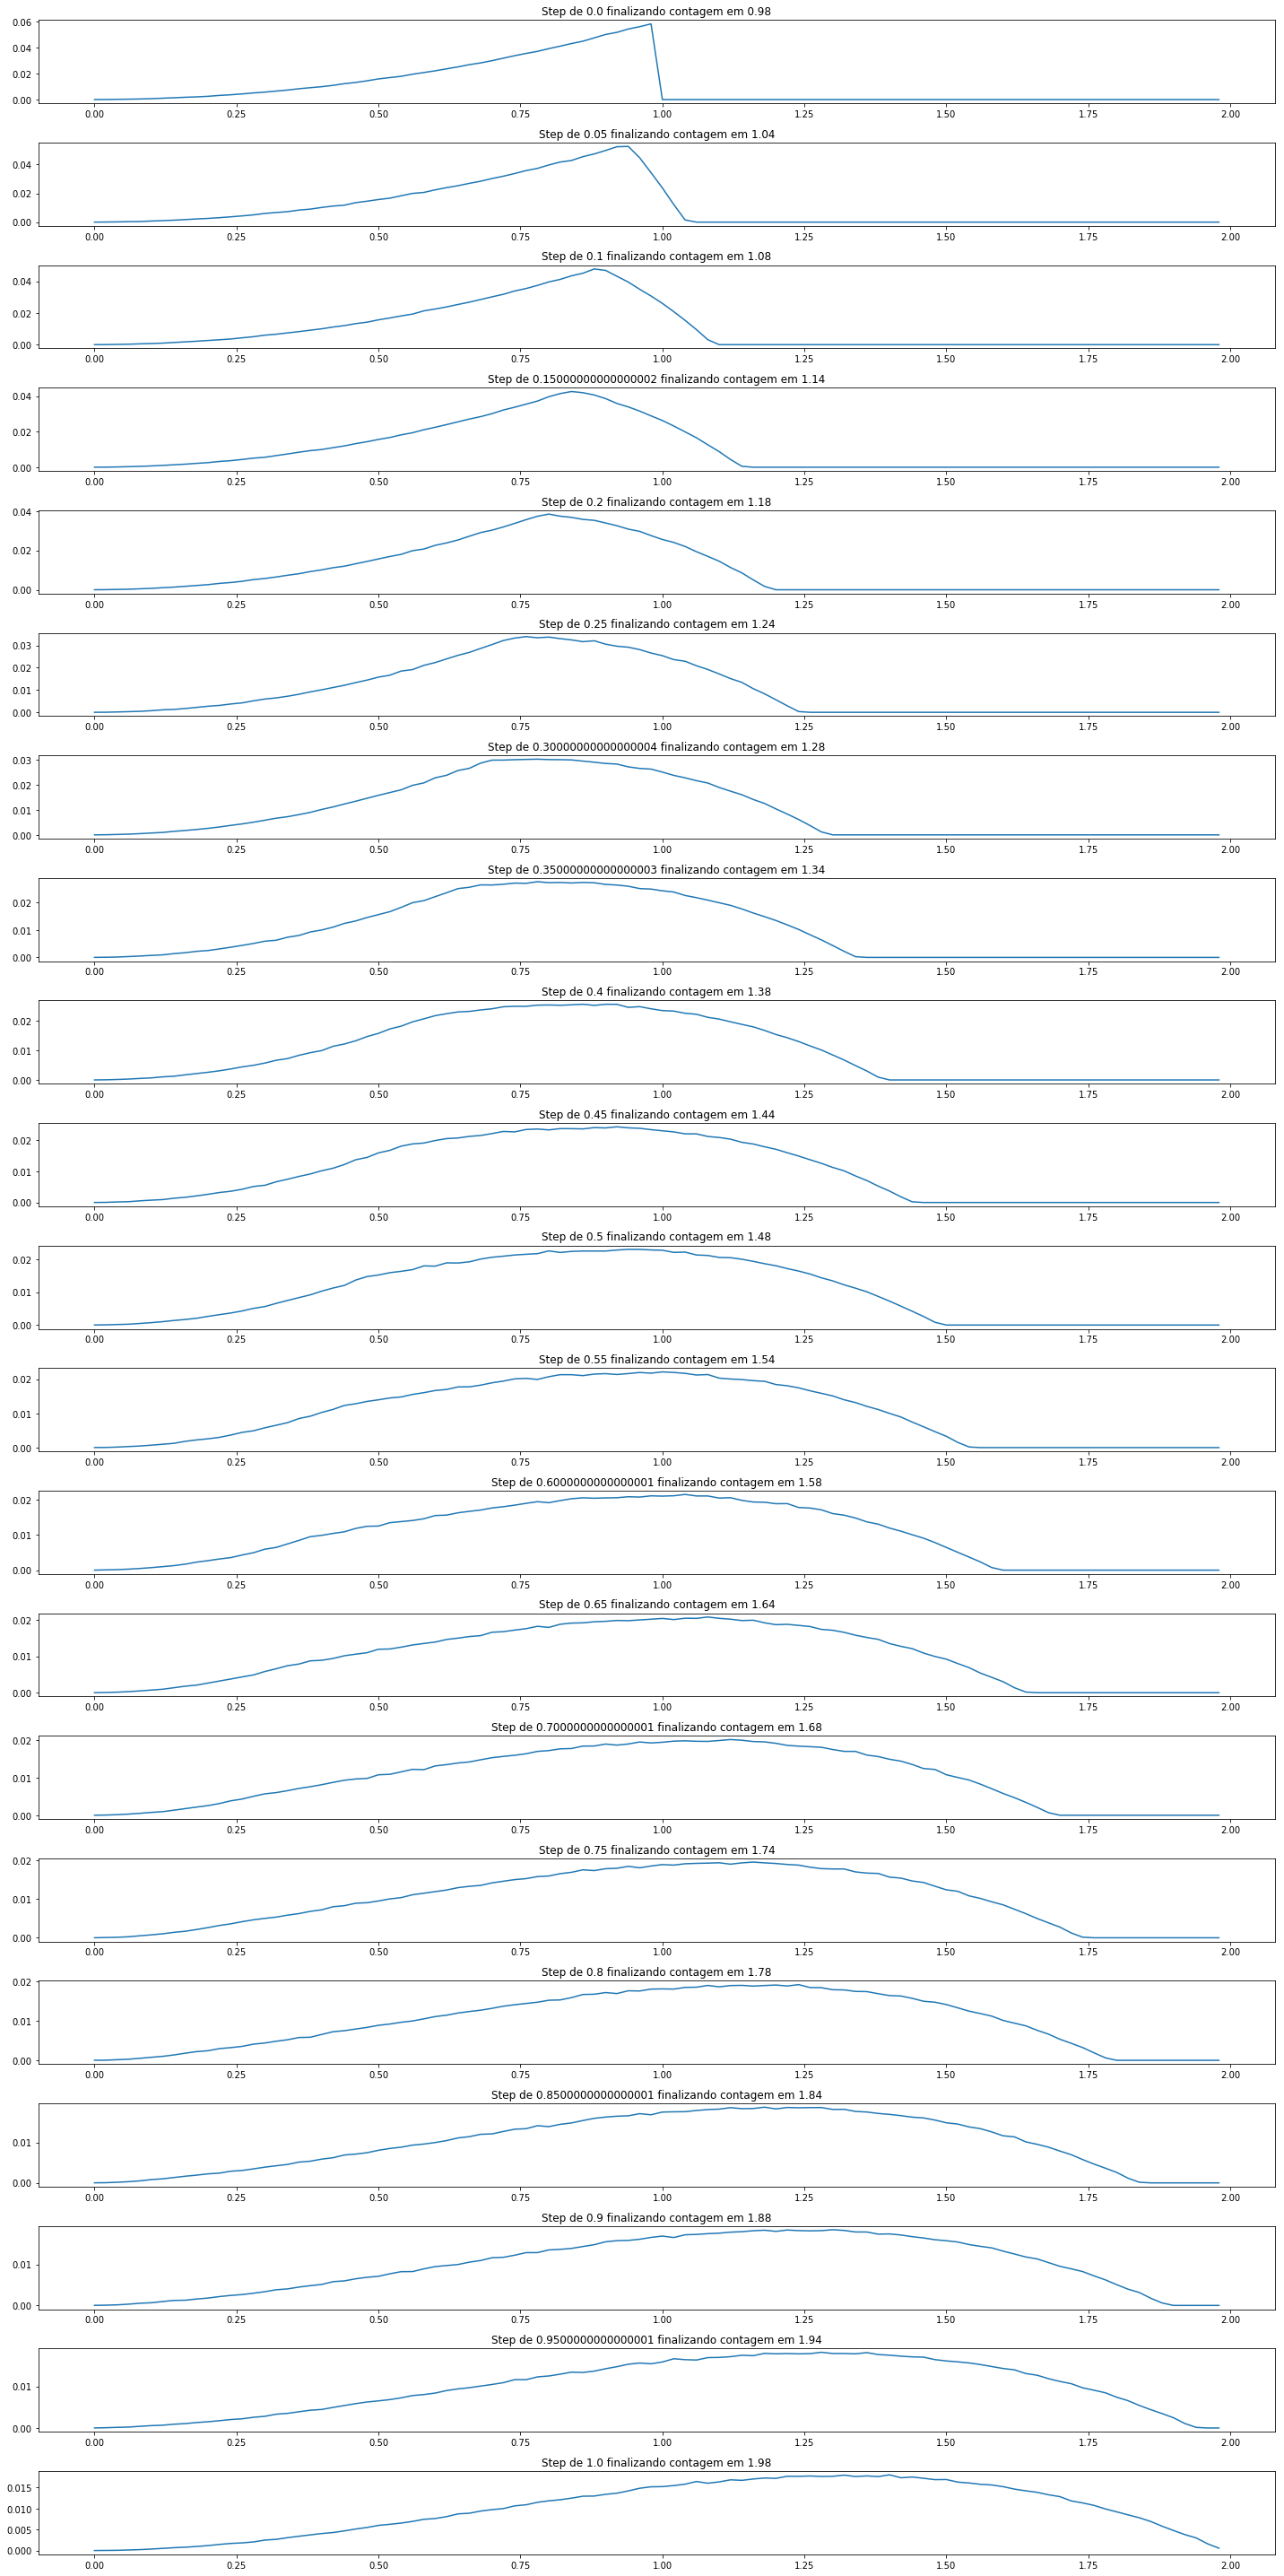

In [46]:
calcula_histograma_distribuicao_distancias_hiperesphera(3)

Calculando Histogramas de dimensao 5


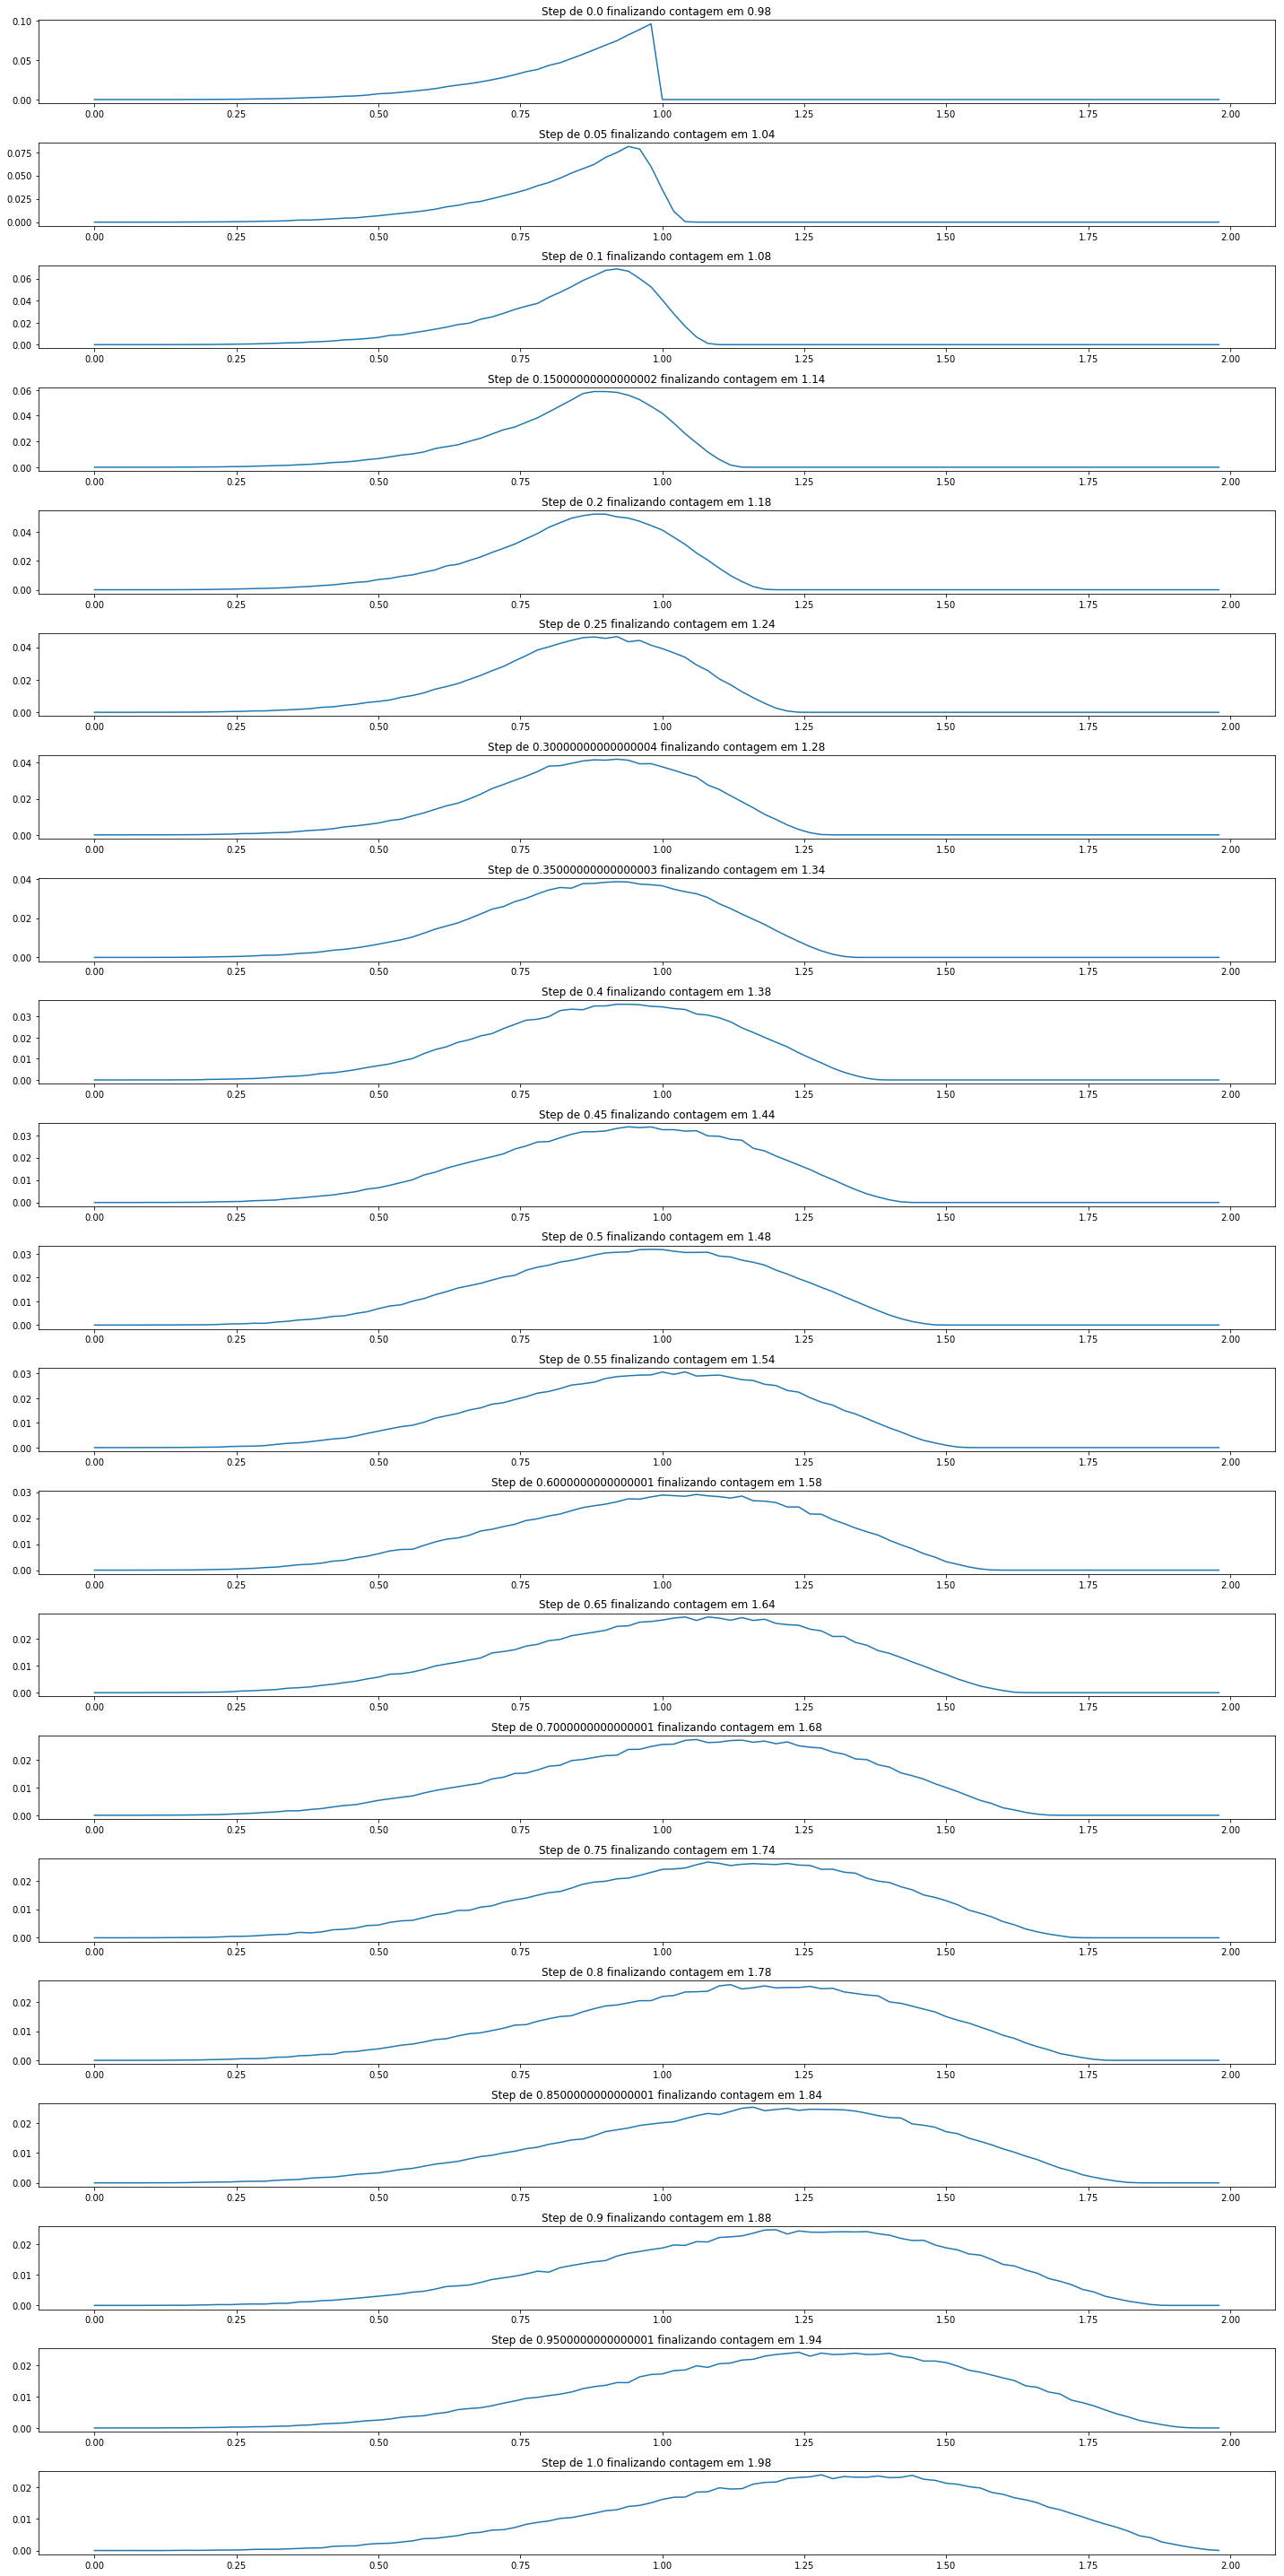

In [48]:
calcula_histograma_distribuicao_distancias_hiperesphera(5)

In [1]:
calcula_histograma_distribuicao_distancias_hiperesphera(8)

NameError: name 'calcula_histograma_distribuicao_distancias_hiperesphera' is not defined